In [77]:
import pandas as pd
import numpy as np
import seaborn as sns

# Assignment 2: Voting Classifiers and Random Forests

In this project, a *voting classifier* will be examined with the *Diagnostic Wisconsin Breast Cancer Database* in order to investigate effective models for malignant tumour detection

# Voting Classifier: The *Diagnostic Wisconsin Breast Cancer Database*

## Data Preparation


In [78]:
data = pd.read_csv('wdbc.data', header=None)

# Column 0 is the ID, which is not need for classification
# Column 1 is the diagnosis, needed as the label of the classification
# 2 - 11 are mean values
# 12 - 21 are standard error
# 22 - 31 are worst

# Dropping the ID column
data.drop(columns=[0], inplace=True)

# Naming the columns
data.columns = ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
               'smoothness_mean','compactness_mean','concavity_mean','concave_points_mean',
               'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se',
               'area_se','smoothness_se','compactness_se','concavity_se','concave_points_se',
               'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',
               'area_worst','smoothness_worst','compactness_worst','concavity_worst',
               'concave_points_worst','symmetry_worst','fractal_dimension_worst']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [79]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

labels = data.iloc[:, 0].values

labels = pd.DataFrame(labels, columns=["diagnosis"])

print("-------- Labels head (5) --------")

print(labels.head(5))

-------- Labels head (5) --------
  diagnosis
0         M
1         M
2         M
3         M
4         M


In [80]:

enc = OrdinalEncoder(categories=[["B", "M"]])
labels_encoded = enc.fit_transform(labels)
labels_encoded = np.reshape(labels_encoded, -1)

all_data = data.iloc[:, 1:31].values

print("-------- Unique encoded values --------")
print(np.unique(labels_encoded))

print("-------- Encoded Labels counts --------")
print(np.unique(labels_encoded, return_counts=True))

-------- Unique encoded values --------
[0. 1.]
-------- Encoded Labels counts --------
(array([0., 1.]), array([357, 212]))


In [81]:

X_train, X_test, y_train, y_test = train_test_split(all_data, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [82]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Logistic Regression

In [83]:
linear_clf = LogisticRegression(random_state=42, max_iter=10000)
linear_clf.fit(X_train, y_train)

print("-------- Linear classifier score --------")
print(linear_clf.score(X_test, y_test))

-------- Linear classifier score --------
0.9385964912280702


## Random Forest Classifier

In [84]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
rf_clf.fit(X_train, y_train)

print("-------- Random forest classifier score --------")
print(rf_clf.score(X_test, y_test))

-------- Random forest classifier score --------
0.9736842105263158


## SVC Classifier

In [85]:
svc_clf = SVC(random_state=42, kernel='linear') 
svc_clf.fit(X_train, y_train)

print("-------- SVC classifier score --------")
print(svc_clf.score(X_test, y_test))

-------- SVC classifier score --------
0.9210526315789473


Voting Classifier

In [86]:
voting_clf = VotingClassifier(
    estimators=[
    ('lr', LogisticRegression(random_state=42, max_iter=10000)),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)),
    ('svc', SVC(random_state=42, kernel='linear', probability=True)),
    ],
    voting='soft',
)

voting_clf.fit(X_train, y_train)
print("-------- Voting classifier score --------")
print(voting_clf.score(X_test, y_test))

-------- Voting classifier score --------
0.9385964912280702


## Evaluation

## Results

# Random Forest Classifier

## Dataset Preparation


The original *Labeled faces in the wild* dataset produced by the University of Massachusetts, is a dataset of 13233 images with 5749. In this report, we will be using sklearn's version of the dataset. This dataset contains 1288 samples of seven different faces, those being:


1. Ariel Sharon
2. Colin Powell
3. Donal Rumsfeld
4. George W Bush
5. Gerhard Schroeder
6. Hugo Chavez
7. Tony Blair

In [173]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.5)

Each instance in the dataset, is an individual image in a specific format.

1. The **data** attribute contains the dataset in a format in which each sample is an unravelled instance of an 62*47 image, each instance thus containing an array of length 2914.

2. The **images** attribute contains the dataset in a format in which each image is a 62*47 image.

3. The **target** attribute contains the label of each images, with an index correlating to a name.


In [ ]:

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
y = lfw_people.target

target_names = lfw_people.target_names

print(lfw_people.data[0].shape)

(2914,)


We can then load the dataset with the *data* attribute, giving us a dataset with *2914* features, with each feature corresponding to a given pixel.

In [ ]:
n_features = X.shape[1]
n_features

2914

There are seven classes, with each class corresponds to a target name.

In [109]:
print(np.unique(lfw_people.target))
print(lfw_people.target_names)

[0 1 2 3 4 5 6]
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


We can also see the distribution of target names. In this dataset, there is an imbalance in the data, with a high quantity of images labelled with *George W Bush*.

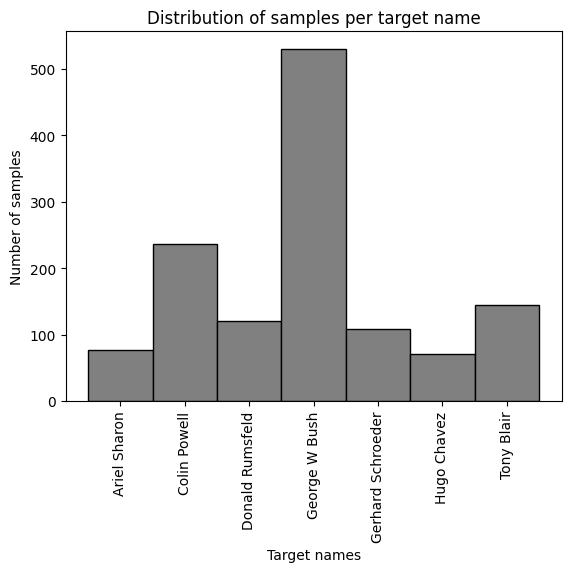

In [ ]:
import matplotlib.pyplot as plt

plt.hist(lfw_people.target, bins=np.arange(len(target_names) + 1) - 0.5, color='gray', edgecolor='black')
plt.xticks(np.arange(len(target_names)), target_names, rotation=90)
plt.xlabel('Target names')
plt.ylabel('Number of samples')
plt.title('Distribution of target names')
plt.show()

We can then split the data with scikit's train_test_split. We must stratify the data to ensure that the training and test data have equal proportions of each class.

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1030, 2914), (258, 2914), (1030,), (258,))

We can thus visualise the images with matplotlib.

### Example Training Image

(np.float64(-0.5), np.float64(46.5), np.float64(61.5), np.float64(-0.5))

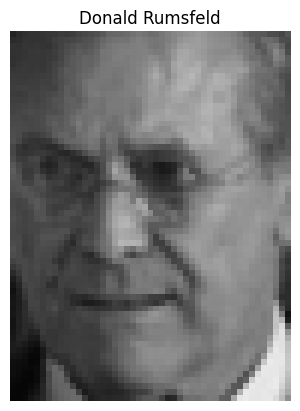

In [ ]:
import cv2
import matplotlib.pyplot as plt
idx = np.random.randint(0, len(x_train))
train_img = x_train[idx].reshape(h, w)  
label_idx = y_train[idx] 
train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)

plt.title(f"{target_names[label_idx]}")
plt.imshow(train_img)
plt.axis('off')

### Example test image

(np.float64(-0.5), np.float64(46.5), np.float64(61.5), np.float64(-0.5))

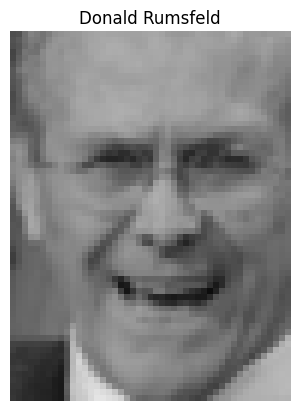

In [ ]:
import cv2

idx = np.random.randint(0, len(x_test))
label_idx = y_test[idx]
test_img = x_test[idx].reshape(h, w)   
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

plt.imshow(test_img)
plt.title(f"{target_names[label_idx]}")
plt.axis('off')

## Basic Model

As per the project specification, a Random forest classifier with 1000 estimators will be used to develop a classification model.

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

We can examine the models performance by using sklearn's *classification_report*.

In [ ]:
from sklearn.metrics import classification_report

# Performance on test data
y_pred = rf_clf.predict(x_test)
rf_clfreport = classification_report(y_test, y_pred, output_dict=True)
rf_clfreport_df = pd.DataFrame(rf_clfreport).transpose()

rf_clfreport_df

,precision,recall,f1-score,support
0,1.000000,0.062500,0.117647,16.000000
1,0.822222,0.787234,0.804348,47.000000
2,1.000000,0.333333,0.500000,24.000000
3,0.581006,0.981132,0.729825,106.000000
4,0.857143,0.272727,0.413793,22.000000
5,1.000000,0.214286,0.352941,14.000000
6,0.666667,0.344828,0.454545,29.000000
accuracy,0.655039,0.655039,0.655039,0.655039
macro avg,0.846720,0.428006,0.481871,258.000000
weighted avg,0.745820,0.655039,0.605715,258.000000


As the report shows, it has quite high variability depending on the label. 
We can visualise the estimations with a confusion matrix

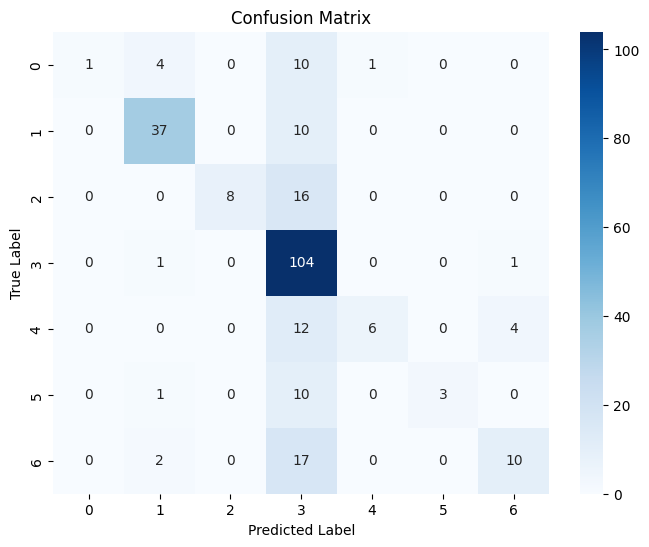

In [ ]:
from sklearn.metrics import confusion_matrix

cf_data = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_data, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We can clearly see that the model's label 3 has has some relatively high variability.

We can investigate the impact that each feature has on the performance, or more simply, the feature importances of the classifier.

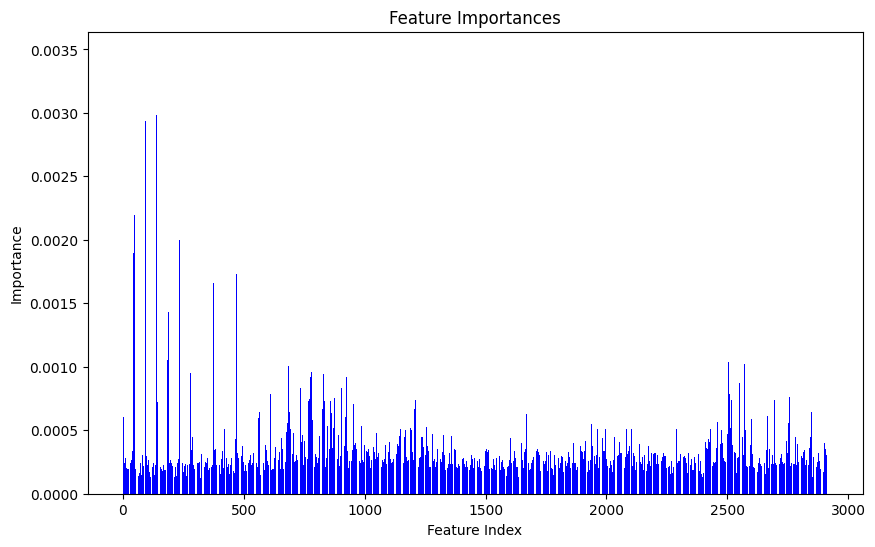

In [163]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_clf.feature_importances_)), rf_clf.feature_importances_, color='blue', align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

As the plot shows, there is a group of features which have significantly greater importance. 

## Principal Component Analysis

In order to reduce the dimensionality of the proble, we can implemet *principal component analysis*. Principal component analysis reduces components to **principal components**, which are the most influential features of the problem. By implementing a PCA with sklearn, we can reduce the features to 150. Sklearn's PCA has an attribute called *explained_variance_ratio*, which determines the amount of variance in the original dataset which is explained by a given principal component.

In [167]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, random_state=42)
data_reduced = pca.fit_transform(lfw_people.data)

print(data_reduced.shape)
print(pca.explained_variance_ratio_[:10])  # Sum of first 10 components
print(np.sum(pca.explained_variance_ratio_))  # Sum of first 10 components

(1288, 150)
[0.20304109 0.13773687 0.06835183 0.05631959 0.04803609 0.02840886
 0.02328441 0.02014366 0.01908491 0.01795693]
0.9357737


### EigenFaces

In computer vision, more specifically the domain of facial recognition, the principal component analysis reduces the instances into what is known as *eigenfaces*, a dimeniosnally reduced image. Eigenfaces are used for more effective estimation as it contains *high* impact features, due to the PCA.

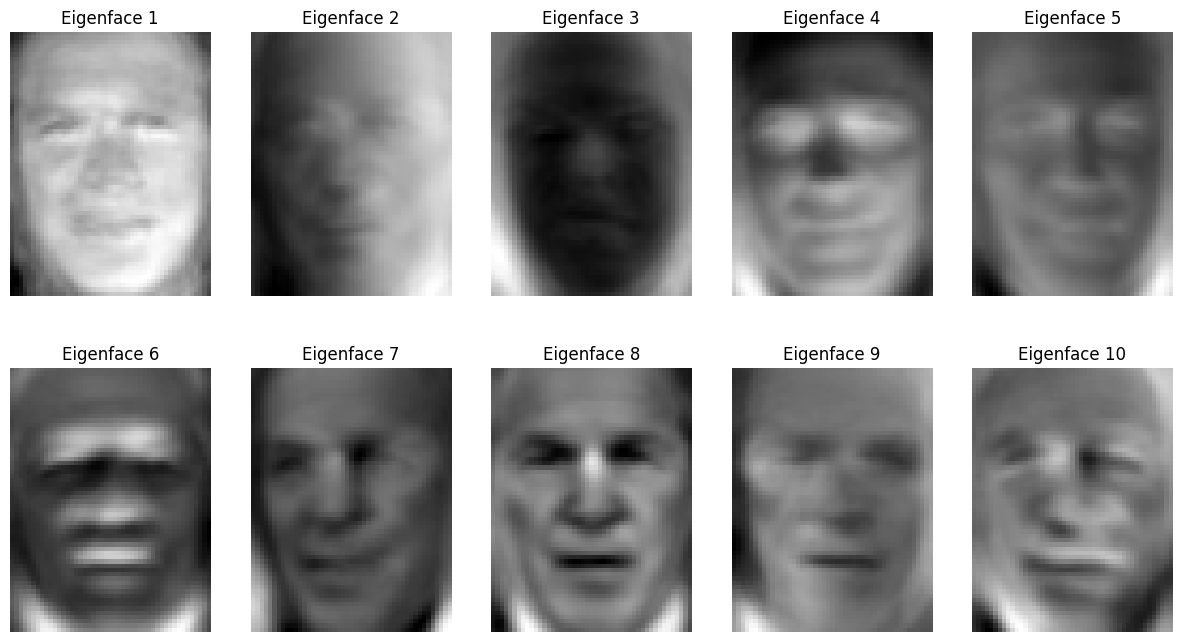

In [168]:
eigenfaces = pca.components_[:10]
eigenfaces = eigenfaces.reshape((10, h, w))

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i + 1}')
    plt.axis('off')

In [169]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(data_reduced, y, test_size=0.2, random_state=42, stratify=y)
x_train_pca.shape, x_test_pca.shape, y_train_pca.shape, y_test_pca.shape

((1030, 150), (258, 150), (1030,), (258,))

### PCA Model

We can evaluate the model's performance on the PCA dataset.

In [170]:
rfpca_clf = RandomForestClassifier(n_estimators=1000)
rfpca_clf.fit(x_train_pca, y_train_pca)

RandomForestClassifier(n_estimators=1000)

In [171]:
y_pred = rfpca_clf.predict(x_test_pca)
print(np.unique(y_pred, return_counts=True))
pcareport = classification_report(y_test_pca, y_pred, output_dict=True, zero_division=0)

pca_report_df = pd.DataFrame(pcareport).transpose()
pca_report_df


(array([1, 2, 3, 6]), array([ 28,   2, 224,   4]))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,16.000000
1,0.892857,0.531915,0.666667,47.000000
2,1.000000,0.083333,0.153846,24.000000
3,0.464286,0.981132,0.630303,106.000000
4,0.000000,0.000000,0.000000,22.000000
5,0.000000,0.000000,0.000000,14.000000
6,1.000000,0.137931,0.242424,29.000000
accuracy,0.523256,0.523256,0.523256,0.523256
macro avg,0.479592,0.247759,0.241891,258.000000
weighted avg,0.558832,0.523256,0.421969,258.000000


Text(0.5, 1.0, 'Confusion Matrix')

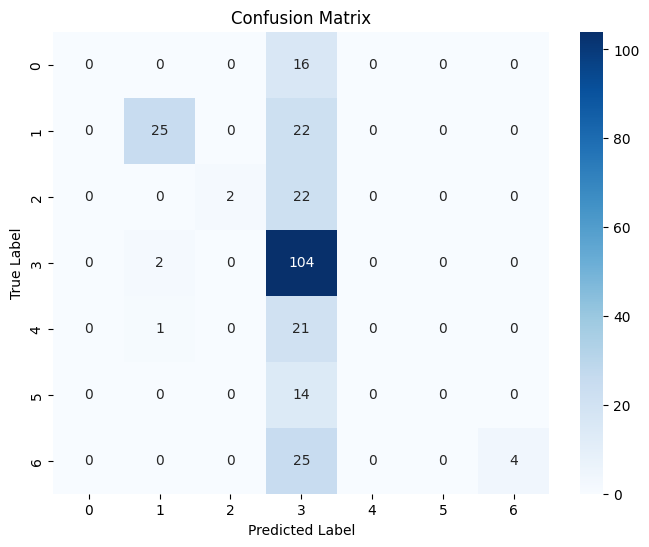

In [172]:
cf_data = confusion_matrix(y_test_pca, y_pred)
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf_data, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')